#**Data Understanding**

**Data Understanding** atau yang biasa disebut dengan **Memahami Data** adalah salah satu tahap penting dalam proses *Knowledge Discovery in Databases* (KDD) atau Data Mining. Ini merupakan langkah awal yang bertujuan untuk memahami data secara mendalam sebelum melakukan analisis lebih lanjut. Pemahaman data yang baik sangat krusial karena akan memengaruhi keberhasilan seluruh proses data mining.

Beberapa kegiatan dalam memahami data diantaranya adalah:


*   Pengumpulan Data

    Fungsi dari pengumpulan data adalah mengumpulkan data dari berbagai sumber, seperti database, file CSV, API, atau sensor. Serta memastikan bahwa semua data yang relevan telah dikumpulkan sesuai tujuan analisis.

*   Profiling Data

    Untuk fungsi profiling data yaitu membuat ringkasan tentang setiap variabel dalam dataset, termasuk tipe data (numerik, kategorikal, ordinal), rentang nilai, dan frekuensi kemunculan. Serta memahami hubungan antarvariabel menggunakan korelasi atau analisis asosiasi.

*   Korelasi dan Asosiasi

    Fungsi dari kegiatan tersebut adalah menghitung koefisien korelasi (misalnya Pearson, Spearman) untuk melihat hubungan linier antar variabel. Selain itu, juga untuk menggunakan teknik asosiasi untuk menemukan pola hubungan antara variabel kategorikal.
*   Eksplorasi Data

    Eksplorasi Data berfungsi sebagai deskripsi statistik untuk memahami distribusi data, seperti mean, median, modus, standar deviasi, minimum, dan maksimum menggunakan visualisasi data.
*   Identifikasi Masalah Data

    Ada beberapa masalah ketika identifikasi data, seperti;
    1. Missing Values: Menemukan data yang hilang atau tidak lengkap.
    2. Outliers: Mendeteksi nilai-nilai ekstrem yang mungkin merupakan kesalahan atau anomali.
    3. Duplikasi Data: Mengidentifikasi baris atau entri yang duplikat.
    4. Inkonsistensi: Memeriksa apakah ada ketidaksesuaian dalam format atau nilai data.

*   Validasi Data

    Ada beberapa masalah ketika validasi data, seperti;
    1. Memastikan bahwa data sesuai dengan domain atau konteks bisnis.
    2. Memverifikasi apakah data mencerminkan realitas atau fenomena yang ingin dipelajari

###**Manfaat Data Understanding**

*   Meningkatkan Kualitas Data

    Dengan memahami masalah data, kita dapat melakukan preprocessing yang lebih efektif

*   Menghemat Waktu dan Biaya

    Menghindari kesalahan analisis yang disebabkan oleh data buruk.

*   Mendukung Pengambilan Keputusan

    Memberikan wawasan awal yang berguna untuk merumuskan strategi analisis.

*   Mengurangi Risiko Kesalahan Model

    Data yang dipahami dengan baik akan menghasilkan model prediktif yang lebih akurat.


## **Proses dalam Memahami Data**


###**1. Pengumpulan Data**

Dataset **IRIS** adalah dataset yang berisi informasi tentang tiga spesies bunga iris (*Setosa, Versicolor, Virginica*) dengan fitur utama yaitu; panjang dan lebar dari sepal serta petal.


####**Lokasi Data**
Teruntuk lokasi dari data **IRIS** berada dalam **aiven.io** (platform cloud dan AI berbasis open source):


*   Data IRIS *petal* berada di database **MySQL**
*   Data IRIS *sepal* berada di database **PostgreSQL**

####**Metode Pengumpulan**
Langkah untuk mengumpulkan data dilakukan menggunakan **Python** sebagai berikut:
*   **`pymysql`** : Digunakan untuk menghubungkan dan mengambil data dari MySQL.
*   **`psycopg2`** : Digunakan untuk menghubungkan dan mengambil data dari PostgreSQL.
*   **`pandas`** : Digunakan untuk membaca dan mengolah data setelah diambil dari database.

####**Proses Mengumpulkan Data**
#####**a. Menghubungkan Data dari MySQL dan PostgreSQL**
*   Install library yang diperlukan





In [1]:
!pip install pymysql
!pip install pandas
!pip install psycopg2-binary
!pip install sqlalchemy
!pip install python-dotenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 15.6 MB/s eta 0:00:00


*   Buat file dengan format (.env) untuk koneksi database dari **aiven**. Untuk isi dari file tersebut sebagai berikut:

```python
# Database MySQL
MYSQL_HOST=<HOSTNAME>
MYSQL_USER=<USERNAME>
MYSQL_PASSWORD=<PASSWORD>
MYSQL_PORT=<PORT>
MYSQL_DATABASE=<DATABASE_NAME>

# Database PostgreSQL
PG_HOST=<HOSTNAME>
PG_USER=<USERNAME>
PG_PASSWORD=<PASSWORD>
PG_PORT=<PORT>
PG_DATABASE=<DATABASE_NAME>
```
*   Lalu upload filenya ke colab.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving pendata.env to pendata.env


*   Koneksikan database dari aiven

In [6]:
import pandas as pd
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv

# Load file .env
load_dotenv()

# Fungsi untuk mendapatkan variabel environment dengan default
def get_env_var(var_name, default=None, cast_type=str):
    value = os.getenv(var_name, default)
    if value is not None:
        try:
            return cast_type(value)  # Konversi ke tipe yang diinginkan
        except ValueError:
            print(f"Warning: {var_name} harus bertipe {cast_type.__name__}, tetapi nilainya '{value}'")
            return default
    return default

# Ambil variabel koneksi dari lingkungan
MYSQL_HOST = get_env_var("MYSQL_HOST", "mysql-201e3cbe-sifa-190.i.aivencloud.com")
MYSQL_PORT = get_env_var("MYSQL_PORT", 15434, int)
MYSQL_USER = get_env_var("MYSQL_USER", "avnadmin")
MYSQL_PASSWORD = get_env_var("MYSQL_PASSWORD", "AVNS_LZy909DRs0jlZfh2C0Q")
MYSQL_DATABASE = get_env_var("MYSQL_DATABASE", "defaultdb")

PG_HOST = get_env_var("PG_HOST", "pg-3d261dbe-sifa-190.i.aivencloud.com")
PG_PORT = get_env_var("PG_PORT", 15434, int)
PG_USER = get_env_var("PG_USER", "avnadmin")
PG_PASSWORD = get_env_var("PG_PASSWORD", "AVNS_dFoBwFz1ZSfQpVx7DRi")
PG_DATABASE = get_env_var("PG_DATABASE", "defaultdb")

# Gunakan SQLAlchemy untuk koneksi ke MySQL
try:
    mysql_engine = create_engine(f"mysql+pymysql://{MYSQL_USER}:{MYSQL_PASSWORD}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DATABASE}")
    print("Koneksi ke MySQL berhasil!")
except Exception as e:
    print(f"Error koneksi ke MySQL: {e}")

# Gunakan SQLAlchemy untuk koneksi ke PostgreSQL
try:
    pg_engine = create_engine(f"postgresql+psycopg2://{PG_USER}:{PG_PASSWORD}@{PG_HOST}:{PG_PORT}/{PG_DATABASE}")
    print("Koneksi ke PostgreSQL berhasil!")
except Exception as e:
    print(f"Error koneksi ke PostgreSQL: {e}")

# Jalankan query jika koneksi berhasil
try:
    mysql_query = "SELECT * FROM irismysql;"
    df_mysql = pd.read_sql(mysql_query, mysql_engine)
    print("Data dari MySQL:")
    print(df_mysql.head())
except Exception as e:
    print(f"Error query MySQL: {e}")

try:
    pg_query = "SELECT * FROM iris_postgresql;"
    df_postgres = pd.read_sql(pg_query, pg_engine)
    print("\nData dari PostgreSQL:")
    print(df_postgres.head())
except Exception as e:
    print(f"Error query PostgreSQL: {e}")


Koneksi ke MySQL berhasil!
Koneksi ke PostgreSQL berhasil!
Data dari MySQL:
   Id        Class sepal_length sepal_width
0   1  Iris-setosa          1.4         0.2
1   2  Iris-setosa          1.4         0.2
2   3  Iris-setosa          1.3         0.2
3   4  Iris-setosa          1.5         0.2
4   5  Iris-setosa          1.4         0.2

Data dari PostgreSQL:
   id        Class sepal_length sepal_width
0   1  Iris-setosa          5.1         3.5
1   2  Iris-setosa          4.9         3.0
2   3  Iris-setosa          4.7         3.2
3   4  Iris-setosa          4.6         3.1
4   5  Iris-setosa          5.0         3.6


#####**b. Mengambil dan menampilkan data serta menghapus file yang di upload sebelumnya**

In [8]:
mysql_query = "SELECT * FROM irismysql;"
df_mysql = pd.read_sql(mysql_query, mysql_engine)

pg_query = "SELECT * FROM iris_postgresql;"
df_postgres = pd.read_sql(pg_query, pg_engine)

# Print hasil query
print("Data dari MySQL:")
print(df_mysql.head())

print("\n Data dari PostgreSQL:")
print(df_postgres.head())

#Menghapus file yang di upload sebelumnya
if os.path.exists(".env"):
    os.remove(".env")

Data dari MySQL:
   Id        Class sepal_length sepal_width
0   1  Iris-setosa          1.4         0.2
1   2  Iris-setosa          1.4         0.2
2   3  Iris-setosa          1.3         0.2
3   4  Iris-setosa          1.5         0.2
4   5  Iris-setosa          1.4         0.2

 Data dari PostgreSQL:
   id        Class sepal_length sepal_width
0   1  Iris-setosa          5.1         3.5
1   2  Iris-setosa          4.9         3.0
2   3  Iris-setosa          4.7         3.2
3   4  Iris-setosa          4.6         3.1
4   5  Iris-setosa          5.0         3.6


#####**c. Menggabungkan Data dari Kedua Database**

In [15]:
df_combined = pd.merge(df_postgres, df_mysql.drop(columns=['Class']), on="sepal_length", how="inner")

print("\nData gabungan:")
print(df_combined)


Data gabungan:
      id           Class sepal_length sepal_width_x   Id sepal_width_y
0      2     Iris-setosa          4.9           3.0   53           1.5
1      2     Iris-setosa          4.9           3.0  110           1.5
2      2     Iris-setosa          4.9           3.0  116           2.4
3      3     Iris-setosa          4.7           3.2   51           1.4
4      3     Iris-setosa          4.7           3.2   57           1.6
..   ...             ...          ...           ...  ...           ...
256  147  Iris-virginica          6.3           2.5  131           2.5
257  147  Iris-virginica          6.3           2.5  146           2.3
258  149  Iris-virginica          6.2           3.4  127           2.2
259  150  Iris-virginica          5.9           3.0  120           3.0
260  150  Iris-virginica          5.9           3.0  129           3.2

[261 rows x 6 columns]


###**2. Profiling Data**
Profiling data termasuk langkah penting dalam memahami karakteristik dataset sebelum melakukan analisis lebih lanjut.

####**Informasi tentang Dataset**
*   Menampilkan Informasi Dataset



In [16]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             261 non-null    int64 
 1   Class          261 non-null    object
 2   sepal_length   261 non-null    object
 3   sepal_width_x  261 non-null    object
 4   Id             261 non-null    int64 
 5   sepal_width_y  261 non-null    object
dtypes: int64(2), object(4)
memory usage: 12.4+ KB


*   Menampilkan Statistik Variabel Numerik



In [17]:
df_combined.drop(columns=['id']).describe()

,Id
count,261.000000
mean,122.973180
std,26.112391
min,51.000000
25%,118.000000
50%,129.000000
75%,140.000000
max,150.000000


*   Menampilkan Statistik Variabel Kategorikal

In [20]:
print(df_combined['Class'].value_counts())

Class
Iris-versicolor    133
Iris-virginica      68
Iris-setosa         60
Name: count, dtype: int64


###**3. Korelasi dan Asosiasi**
####**Memahami Hubungan antar Variabel**
*   Menghitung Korelasi antar Variabel Numerik

In [21]:
df_corr = df_combined.drop(columns=['id', 'Class']).corr()
print(df_corr)

               sepal_length  sepal_width_x        Id  sepal_width_y
sepal_length       1.000000       0.303325  0.640574       0.804897
sepal_width_x      0.303325       1.000000  0.308442       0.362135
Id                 0.640574       0.308442  1.000000       0.730448
sepal_width_y      0.804897       0.362135  0.730448       1.000000


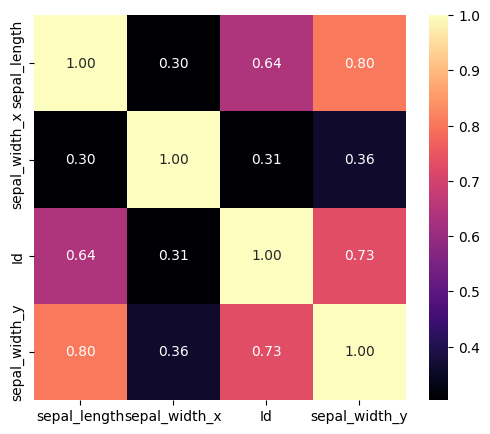

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.heatmap(df_corr, annot=True, cmap='magma', fmt=".2f")

plt.show()


*   Statistik Deskriptif Per Class

In [45]:
df_combined = df_combined.apply(pd.to_numeric, errors='coerce')

df_mean = df_combined.drop(columns=['id'], errors='ignore').groupby('Class').mean(numeric_only=True)
print(df_mean)

Empty DataFrame
Columns: [sepal_length, sepal_width_x, Id, sepal_width_y]
Index: []


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Class", y="petal length", data=df_combined)
plt.show()

###**4. Eksplorasi Data**
Eksplorasi data bertujuan untuk mendeskripsikan statistik untuk memahami distribusi data


In [47]:
df_combined.drop(columns=['id']).describe().loc[['mean', 'std', 'min', '50%', 'max']]

,Class,sepal_length,sepal_width_x,Id,sepal_width_y
mean,NaN,5.648276,2.808046,122.973180,2.459770
std,NaN,0.675083,0.588064,26.112391,0.585424
min,NaN,4.000000,1.300000,51.000000,1.300000
50%,NaN,5.700000,2.900000,129.000000,2.600000
max,NaN,6.800000,4.400000,150.000000,3.400000


**a. Distribusi Data Numerik**

menggunakan histogram untuk melihat sebaran nilai dari setiap fitur

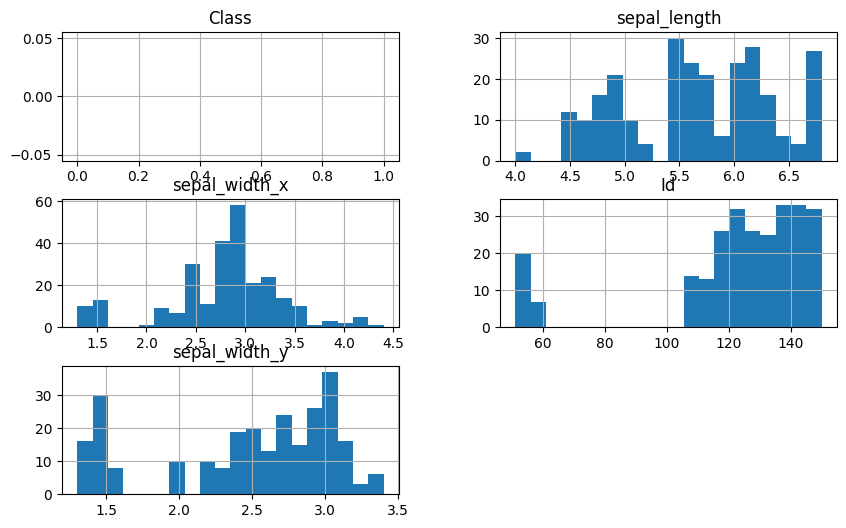

In [48]:
import matplotlib.pyplot as plt

df_combined.loc[:, df_combined.columns != 'id'].hist(figsize=(10, 6), bins=20)
plt.show()

**b. Hubungan antar Variabel**

Scatter plot membantu melihat hubungan antara dua variabel numerik.

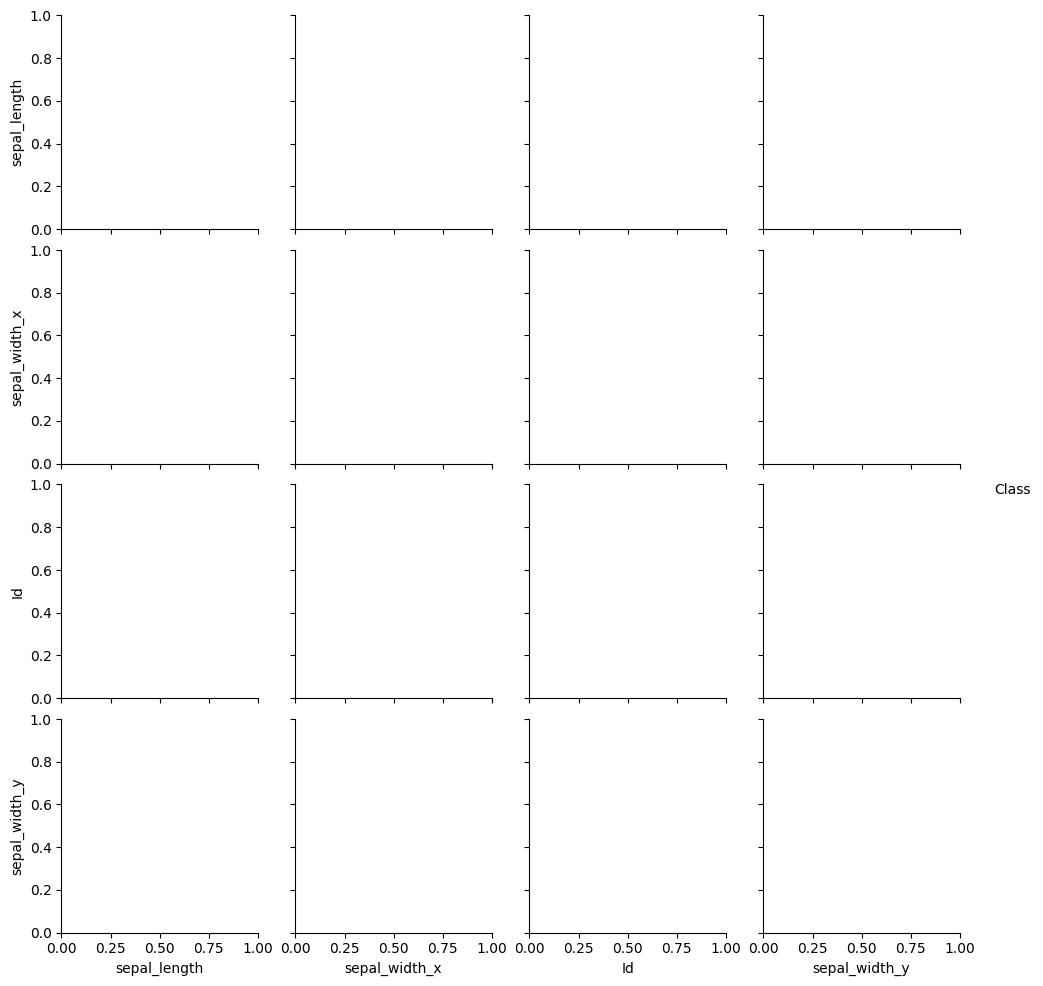

In [49]:
sns.pairplot(df_combined.drop(columns=["id"]), hue="Class")
plt.show()

**c. Ditribusi Data tiap Kategori**

Menggunakan box plot untuk melihat tiap kategori.

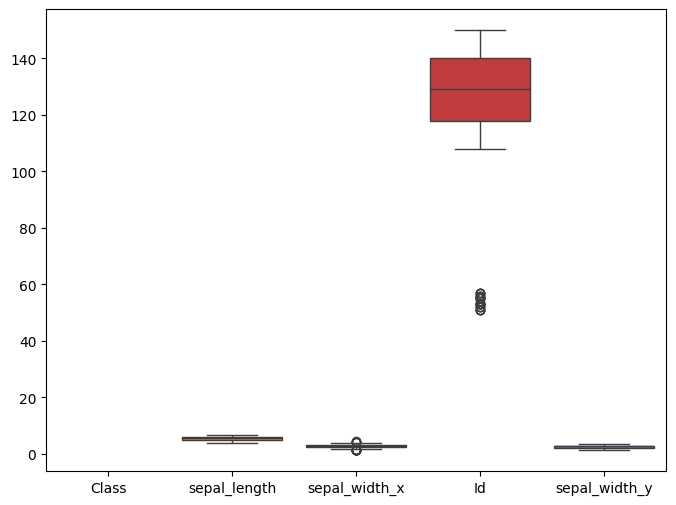

In [50]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_combined.loc[:, df_combined.columns != 'id'])
plt.show()

**d. Proporsi tiap Spesies Bunga**

Menggunakan pie chart untuk melihat tiap spesies bunga.

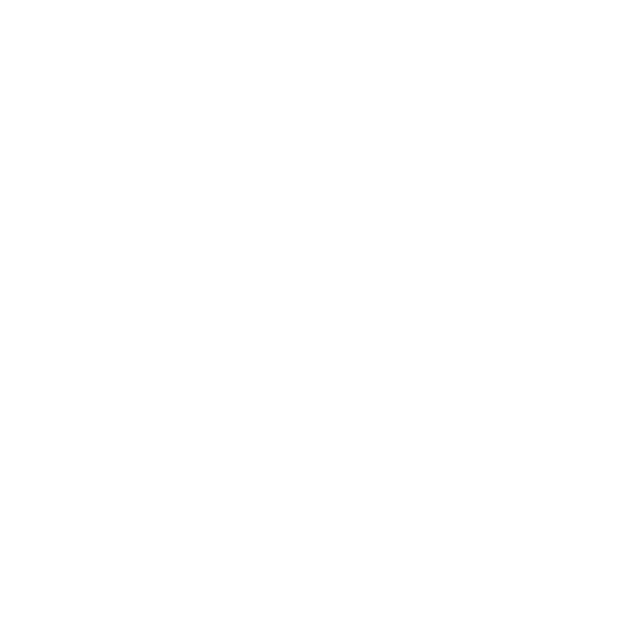

In [53]:
import matplotlib.pyplot as plt

category_counts = df_combined['Class'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.show()


###**5. Indentifikasi Masalah**

Mengidentifikasi Masalah jika menemukan potensi kendala dalam dataset yang bisa mempengaruhi analisis dan modeling.

####**Mengecek Data Hilang (Missing Value)**

In [54]:
print(df_combined.isnull().sum())

id                 0
Class            261
sepal_length       0
sepal_width_x      0
Id                 0
sepal_width_y      0
dtype: int64


####**Mendeteksi Outliers**

In [55]:
# Memilih hanya kolom numerik
df_numeric = df_combined.select_dtypes(include=['number'])

# Menghitung IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Menentukan outliers
outliers = (df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))
print(outliers.sum())


id                0
Class             0
sepal_length      0
sepal_width_x    25
Id               27
sepal_width_y     0
dtype: int64


####**Mengecek Duplikasi Data**


In [56]:
print(df_combined.duplicated().sum())

0


####**Mengecek Inkonsistensi**

In [58]:
# Cek kategori unik dalam Class
print(df_combined['Class'].unique())

[nan]


In [59]:
# Cek tipe data setiap kolom
print(df_combined.dtypes)

id                 int64
Class            float64
sepal_length     float64
sepal_width_x    float64
Id                 int64
sepal_width_y    float64
dtype: object


In [ ]:
# cek tipe data setiap nilai
for col in ['sepal_length', 'sepal_width', 'petal length', 'petal width']:
    print(f"{col}: {df_combined[col].apply(type).unique()}")